Scroll to Bottom to see eda conclusion and model implementation

In [862]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
plt.style.use('dark_background')

In [863]:
df = pd.read_csv(r"./ai_job_market_insights.csv")
df.rename(columns={'Job_Growth_Projection':'Growth'},inplace=True)
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Growth
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_Title          500 non-null    object 
 1   Industry           500 non-null    object 
 2   Company_Size       500 non-null    object 
 3   Location           500 non-null    object 
 4   AI_Adoption_Level  500 non-null    object 
 5   Automation_Risk    500 non-null    object 
 6   Required_Skills    500 non-null    object 
 7   Salary_USD         500 non-null    float64
 8   Remote_Friendly    500 non-null    object 
 9   Growth             500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


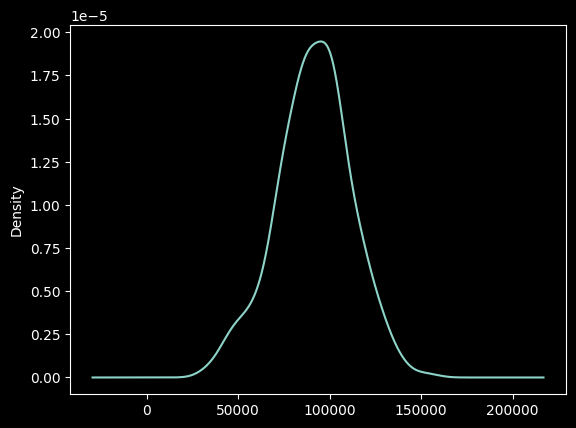

<Axes: xlabel='Growth', ylabel='Salary_USD'>

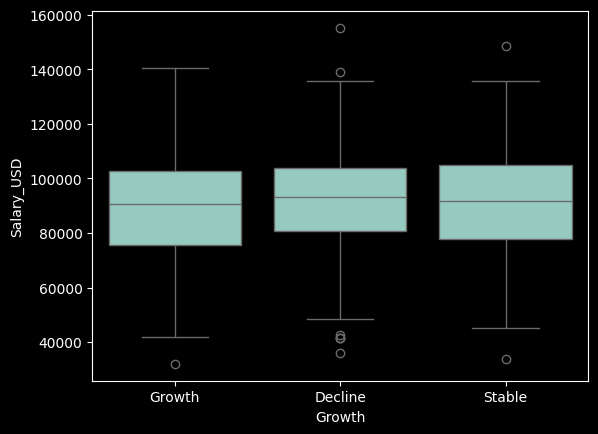

In [865]:
df['Salary_USD'].plot(kind='kde')
plt.show()
sns.boxplot(x='Growth',y='Salary_USD',data=df)

<Axes: xlabel='Job_Title'>

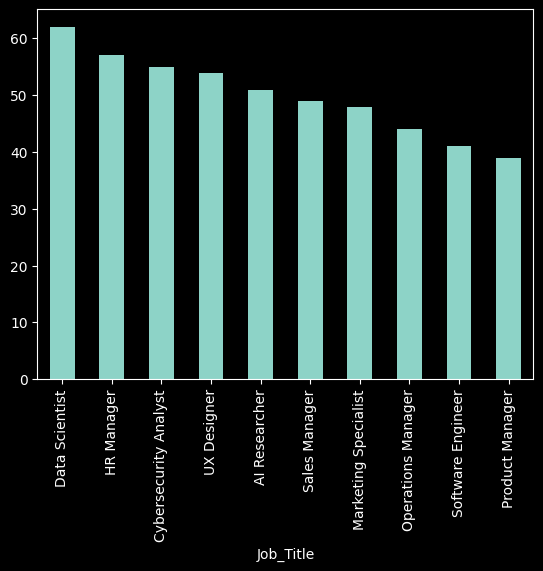

In [866]:
df['Job_Title'].value_counts().plot(kind='bar')

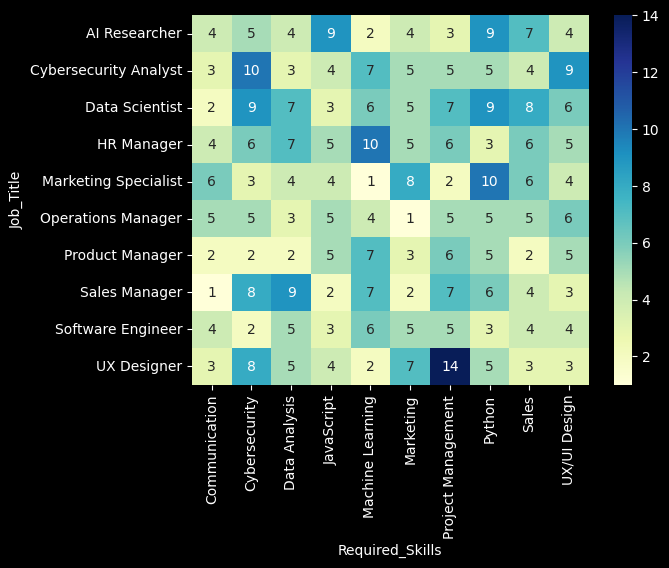

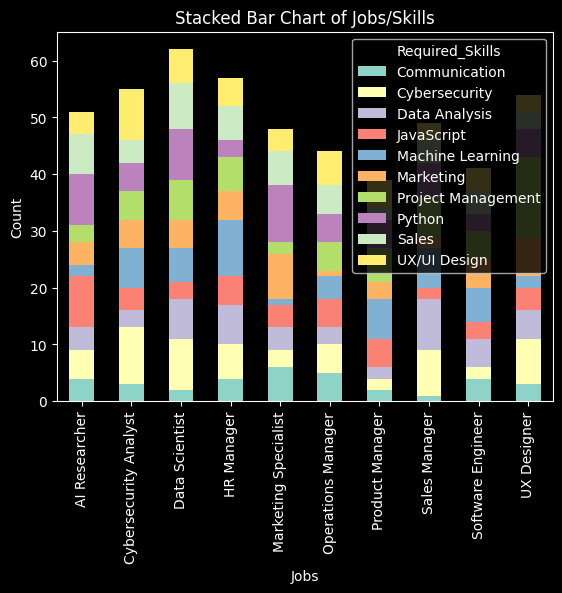

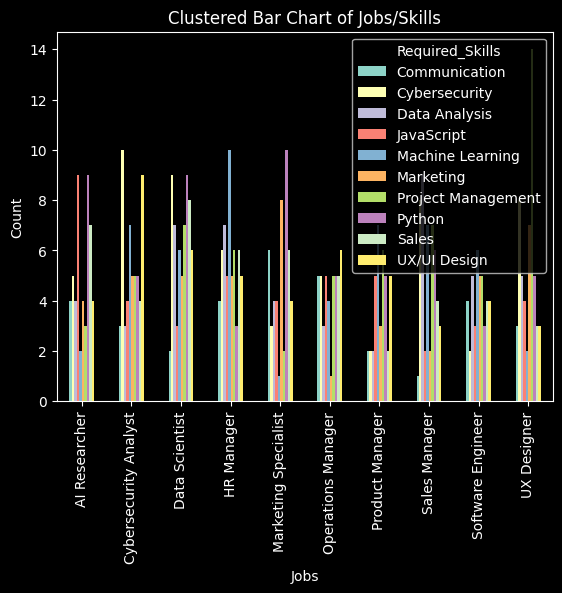

In [867]:
cross_tab = pd.crosstab(df['Job_Title'], df['Required_Skills'])
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.show()
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Jobs')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Jobs/Skills')
plt.show()
cross_tab.plot(kind='bar')
plt.xlabel('Jobs')
plt.ylabel('Count')
plt.title('Clustered Bar Chart of Jobs/Skills')
plt.show()



In [868]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Growth'],
      dtype='object')

In [869]:
print(pd.crosstab(df['Industry'],df['Growth']))
print(pd.crosstab(df['AI_Adoption_Level'],df['Automation_Risk']))
print(pd.crosstab(df['Location'],df['Growth']))

Growth              Decline  Growth  Stable
Industry                                   
Education                16      24      17
Energy                   20      12      17
Entertainment            18      17      12
Finance                  15      23      15
Healthcare               13      15      14
Manufacturing            27      20      11
Retail                   19       9      18
Technology               19      18      19
Telecommunications       12      17      24
Transportation           10      14      15
Automation_Risk    High  Low  Medium
AI_Adoption_Level                   
High                 48   43      56
Low                  53   61      60
Medium               68   54      57
Growth         Decline  Growth  Stable
Location                              
Berlin              17      18      13
Dubai               21      14      16
London              12      13      21
New York            12      19      18
Paris               20       9      17
San Francisco 

In [870]:
pd.crosstab(df['Job_Title'],df['Growth'])

Growth,Decline,Growth,Stable
Job_Title,,,
AI Researcher,16,20,15
Cybersecurity Analyst,19,14,22
Data Scientist,23,22,17
HR Manager,22,14,21
Marketing Specialist,23,11,14
Operations Manager,7,19,18
Product Manager,10,15,14
Sales Manager,16,19,14
Software Engineer,12,16,13


<Axes: xlabel='Growth', ylabel='Salary_USD'>

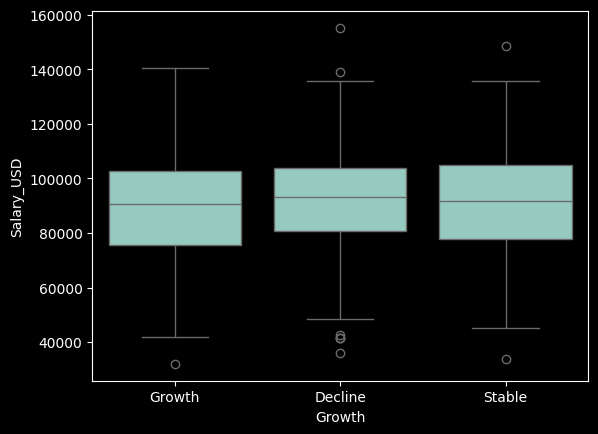

In [871]:
sns.boxplot(x='Growth',y='Salary_USD',data=df)

In [872]:
df1 = df[df['Growth']=='Growth']
pd.crosstab(df1['Company_Size'],df1['Automation_Risk'])

Automation_Risk,High,Low,Medium
Company_Size,,,
Large,20,14,25
Medium,18,19,10
Small,25,17,21


In [873]:
df1 = df[df['Growth']=='Decline']
pd.crosstab(df1['Company_Size'],df1['Automation_Risk'])

Automation_Risk,High,Low,Medium
Company_Size,,,
Large,16,13,18
Medium,20,21,16
Small,19,24,22


In [874]:
df1 = df[df['Growth']=='Growth']
pd.crosstab(df1['Company_Size'],df1['AI_Adoption_Level'])

AI_Adoption_Level,High,Low,Medium
Company_Size,,,
Large,16,21,22
Medium,11,15,21
Small,19,25,19


In [875]:
df1 = df[df['Growth']=='Decline']
pd.crosstab(df1['Company_Size'],df1['AI_Adoption_Level'])

AI_Adoption_Level,High,Low,Medium
Company_Size,,,
Large,16,12,19
Medium,15,20,22
Small,24,20,21


In [876]:
pd.crosstab(df['Company_Size'],df['Required_Skills'],normalize='index')*100

Required_Skills,Communication,Cybersecurity,Data Analysis,JavaScript,Machine Learning,Marketing,Project Management,Python,Sales,UX/UI Design
Company_Size,,,,,,,,,,
Large,6.626506,12.650602,9.638554,9.638554,9.036145,8.433735,13.253012,12.048193,9.638554,9.036145
Medium,7.975460,9.202454,10.429448,7.361963,11.656442,7.975460,8.588957,12.269939,12.883436,11.656442
Small,5.847953,12.865497,9.356725,9.356725,10.526316,10.526316,14.035088,11.695906,7.017544,8.771930


In [877]:
pd.crosstab(df['Company_Size'],df['Job_Title'],normalize='index')*100

Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Company_Size,,,,,,,,,,
Large,9.638554,12.048193,13.855422,12.048193,9.036145,7.831325,9.638554,9.638554,7.228916,9.036145
Medium,12.883436,9.815951,10.429448,12.269939,12.269939,7.361963,6.748466,9.815951,7.975460,10.429448
Small,8.187135,11.111111,12.865497,9.941520,7.602339,11.111111,7.017544,9.941520,9.356725,12.865497


In [878]:
pd.crosstab(df['Company_Size'],df['Industry'],normalize='index')*100

Industry,Education,Energy,Entertainment,Finance,Healthcare,Manufacturing,Retail,Technology,Telecommunications,Transportation
Company_Size,,,,,,,,,,
Large,9.638554,9.638554,8.433735,9.036145,12.048193,12.048193,8.433735,13.253012,9.638554,7.831325
Medium,13.496933,9.202454,7.975460,14.110429,6.134969,10.429448,11.656442,10.429448,9.815951,6.748466
Small,11.111111,10.526316,11.695906,8.771930,7.017544,12.280702,7.602339,9.941520,12.280702,8.771930


In [879]:
pd.crosstab(df['Location'],df['Industry'],normalize='index')*100

Industry,Education,Energy,Entertainment,Finance,Healthcare,Manufacturing,Retail,Technology,Telecommunications,Transportation
Location,,,,,,,,,,
Berlin,12.500000,12.500000,12.500000,2.083333,10.416667,8.333333,10.416667,10.416667,16.666667,4.166667
Dubai,7.843137,9.803922,5.882353,7.843137,13.725490,9.803922,9.803922,9.803922,13.725490,11.764706
London,13.043478,6.521739,6.521739,8.695652,8.695652,17.391304,8.695652,10.869565,13.043478,6.521739
New York,14.285714,12.244898,10.204082,6.122449,2.040816,14.285714,10.204082,12.244898,14.285714,4.081633
Paris,10.869565,6.521739,8.695652,10.869565,19.565217,17.391304,4.347826,8.695652,2.173913,10.869565
San Francisco,9.677419,9.677419,4.838710,19.354839,6.451613,9.677419,9.677419,12.903226,8.064516,9.677419
Singapore,11.111111,16.666667,16.666667,11.111111,3.703704,7.407407,5.555556,12.962963,5.555556,9.259259
Sydney,9.615385,7.692308,9.615385,5.769231,11.538462,15.384615,13.461538,9.615385,11.538462,5.769231
Tokyo,13.725490,5.882353,13.725490,15.686275,5.882353,11.764706,9.803922,9.803922,9.803922,3.921569


In [880]:
pd.crosstab(df['Industry'],df['Growth'],normalize='index')

Growth,Decline,Growth,Stable
Industry,,,
Education,0.280702,0.421053,0.298246
Energy,0.408163,0.244898,0.346939
Entertainment,0.382979,0.361702,0.255319
Finance,0.283019,0.433962,0.283019
Healthcare,0.309524,0.357143,0.333333
Manufacturing,0.465517,0.344828,0.189655
Retail,0.413043,0.195652,0.391304
Technology,0.339286,0.321429,0.339286
Telecommunications,0.226415,0.320755,0.452830


In [881]:
pd.crosstab(df['Industry'],df['Job_Title'],normalize='index')*100

Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Industry,,,,,,,,,,
Education,12.280702,12.280702,14.035088,10.526316,7.017544,7.017544,8.771930,7.017544,3.508772,17.543860
Energy,10.204082,10.204082,10.204082,14.285714,12.244898,10.204082,8.163265,10.204082,2.040816,12.244898
Entertainment,6.382979,17.021277,17.021277,12.765957,6.382979,12.765957,6.382979,6.382979,6.382979,8.510638
Finance,13.207547,3.773585,7.547170,20.754717,11.320755,7.547170,13.207547,11.320755,5.660377,5.660377
Healthcare,4.761905,19.047619,7.142857,4.761905,11.904762,14.285714,7.142857,9.523810,9.523810,11.904762
Manufacturing,10.344828,10.344828,10.344828,10.344828,10.344828,5.172414,5.172414,15.517241,10.344828,12.068966
Retail,13.043478,6.521739,6.521739,13.043478,19.565217,2.173913,2.173913,10.869565,10.869565,15.217391
Technology,10.714286,10.714286,17.857143,8.928571,8.928571,14.285714,7.142857,5.357143,8.928571,7.142857
Telecommunications,3.773585,13.207547,18.867925,11.320755,5.660377,5.660377,9.433962,9.433962,13.207547,9.433962


In [882]:
pd.crosstab(df['Industry'],df['Required_Skills'],normalize='index')*100

Required_Skills,Communication,Cybersecurity,Data Analysis,JavaScript,Machine Learning,Marketing,Project Management,Python,Sales,UX/UI Design
Industry,,,,,,,,,,
Education,8.771930,15.789474,15.789474,7.017544,12.280702,5.263158,17.543860,7.017544,7.017544,3.508772
Energy,4.081633,10.204082,12.244898,8.163265,12.244898,6.122449,6.122449,10.204082,12.244898,18.367347
Entertainment,6.382979,17.021277,4.255319,12.765957,8.510638,14.893617,12.765957,8.510638,8.510638,6.382979
Finance,3.773585,15.094340,3.773585,11.320755,15.094340,1.886792,11.320755,16.981132,9.433962,11.320755
Healthcare,11.904762,4.761905,11.904762,11.904762,11.904762,7.142857,9.523810,19.047619,4.761905,7.142857
Manufacturing,12.068966,12.068966,6.896552,5.172414,10.344828,13.793103,13.793103,13.793103,6.896552,5.172414
Retail,6.521739,19.565217,10.869565,10.869565,13.043478,6.521739,10.869565,6.521739,4.347826,10.869565
Technology,1.785714,7.142857,8.928571,8.928571,7.142857,17.857143,7.142857,10.714286,16.071429,14.285714
Telecommunications,5.660377,7.547170,13.207547,5.660377,9.433962,11.320755,16.981132,9.433962,11.320755,9.433962


In [883]:
pd.crosstab(df['Required_Skills'],df['Automation_Risk'],normalize='index')*100

Automation_Risk,High,Low,Medium
Required_Skills,,,
Communication,26.470588,47.058824,26.470588
Cybersecurity,31.034483,31.034483,37.931034
Data Analysis,36.734694,26.530612,36.734694
JavaScript,36.363636,34.090909,29.545455
Machine Learning,36.538462,32.692308,30.769231
Marketing,28.888889,22.222222,48.888889
Project Management,38.333333,30.000000,31.666667
Python,25.000000,36.666667,38.333333
Sales,48.979592,22.448980,28.571429


In [884]:
pd.crosstab(df['Required_Skills'],df['AI_Adoption_Level'],normalize='index')*100

AI_Adoption_Level,High,Low,Medium
Required_Skills,,,
Communication,26.470588,35.294118,38.235294
Cybersecurity,34.482759,29.310345,36.206897
Data Analysis,26.530612,28.571429,44.897959
JavaScript,22.727273,38.636364,38.636364
Machine Learning,25.000000,32.692308,42.307692
Marketing,48.888889,28.888889,22.222222
Project Management,25.000000,43.333333,31.666667
Python,35.000000,40.000000,25.000000
Sales,18.367347,34.693878,46.938776


In [885]:
pd.crosstab(df['Required_Skills'],df['Growth'])

Growth,Decline,Growth,Stable
Required_Skills,,,
Communication,15,8,11
Cybersecurity,21,20,17
Data Analysis,15,16,18
JavaScript,15,14,15
Machine Learning,14,24,14
Marketing,17,11,17
Project Management,17,21,22
Python,22,18,20
Sales,17,16,16


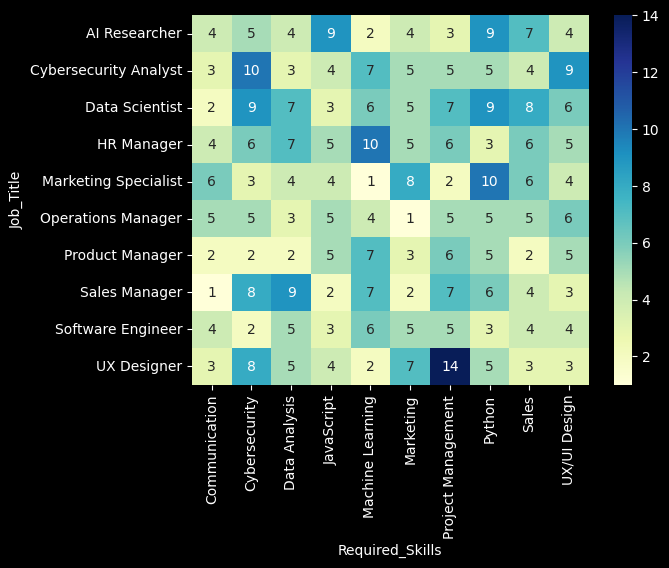

In [886]:
cross_tab = pd.crosstab(df['Job_Title'], df['Required_Skills'])
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.show()

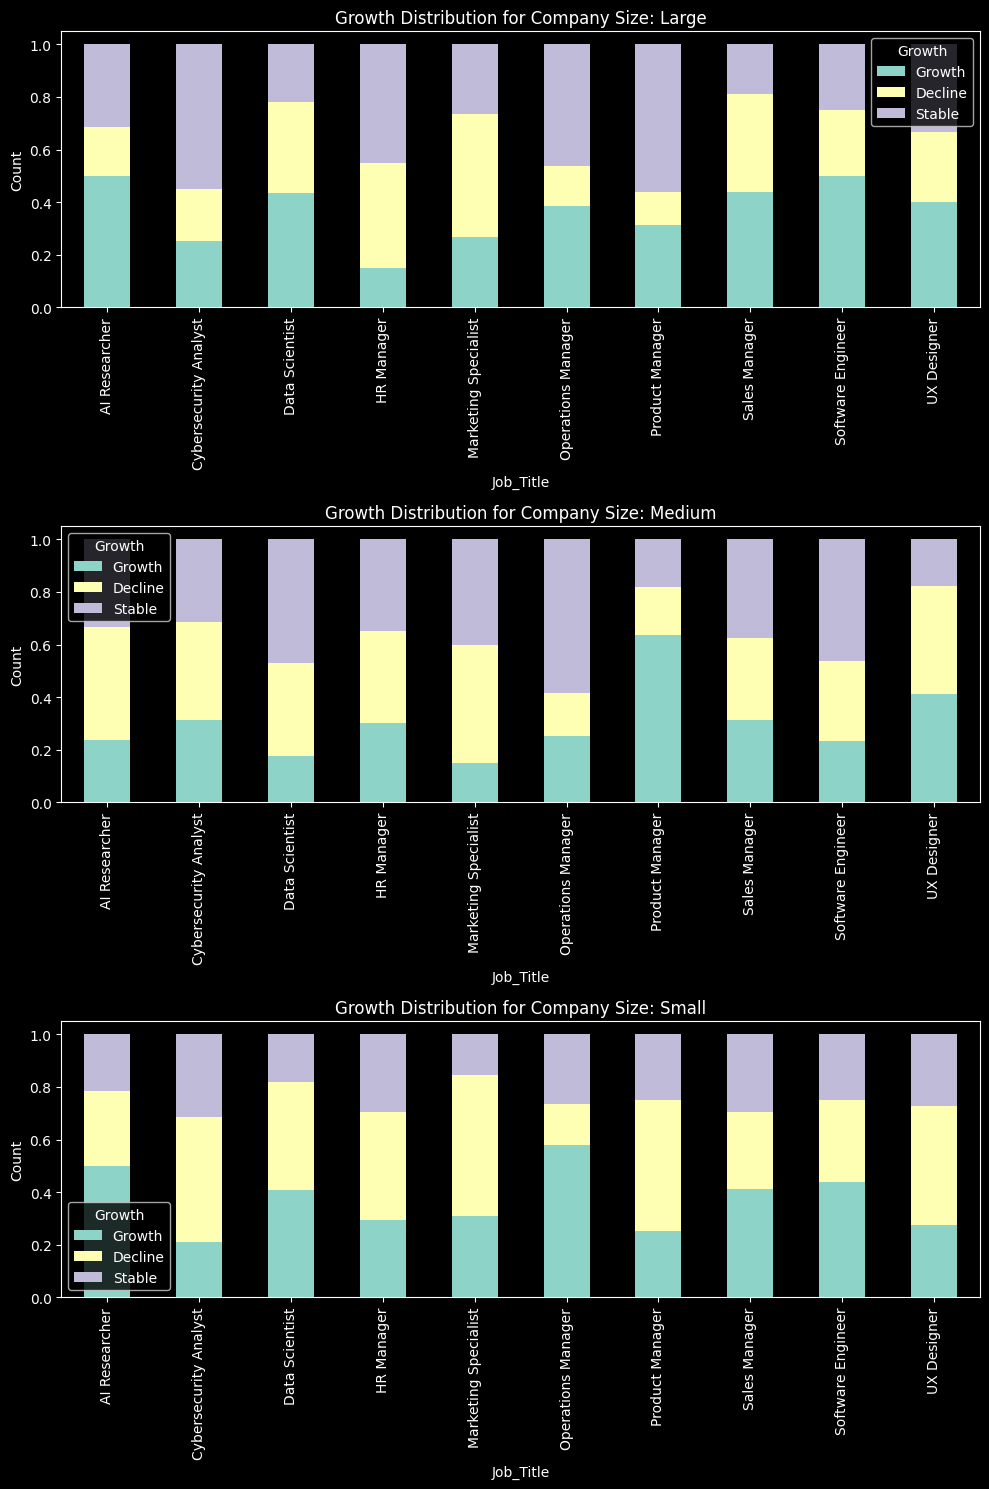

In [887]:
grouped = df.groupby(['Company_Size', 'Job_Title', 'Growth']).size().reset_index(name='Count')
pivoted = grouped.pivot_table(index=['Company_Size', 'Job_Title'], columns='Growth', values='Count', fill_value=0).reset_index()
pivoted[['Growth', 'Decline', 'Stable']] = pivoted[['Growth', 'Decline', 'Stable']].div(pivoted[['Growth', 'Decline', 'Stable']].sum(axis=1), axis=0)
company_sizes = pivoted['Company_Size'].unique()
fig, axes = plt.subplots(len(company_sizes), 1, figsize=(10, 5*len(company_sizes)))
for i, size in enumerate(company_sizes):
    ax = axes[i]
    subset = pivoted[pivoted['Company_Size'] == size]
    subset.set_index('Job_Title')[['Growth', 'Decline', 'Stable']].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Growth Distribution for Company Size: {size}')
    ax.set_ylabel('Count')
    ax.set_xlabel('Job_Title')
plt.tight_layout()
plt.show()

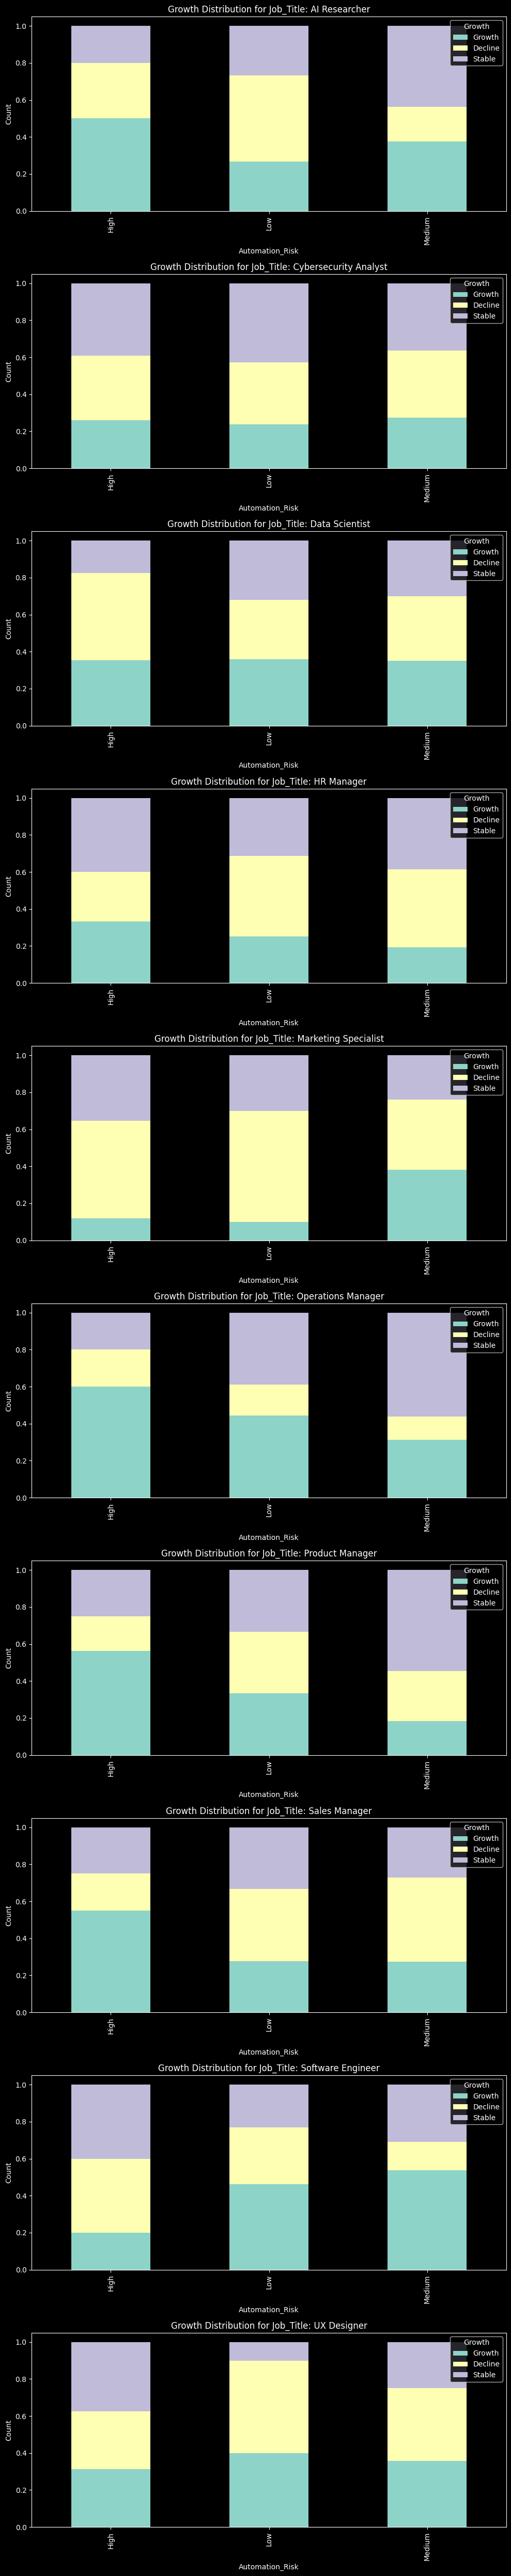

In [888]:
grouped = df.groupby(['Job_Title', 'Automation_Risk', 'Growth']).size().reset_index(name='Count')
pivoted = grouped.pivot_table(index=['Job_Title','Automation_Risk'], columns='Growth', values='Count', fill_value=0).reset_index()
pivoted[['Growth', 'Decline', 'Stable']] = pivoted[['Growth', 'Decline', 'Stable']].div(pivoted[['Growth', 'Decline', 'Stable']].sum(axis=1), axis=0)
industries = pivoted['Job_Title'].unique()
fig, axes = plt.subplots(len(industries), 1, figsize=(10, 5*len(industries)))
for i, size in enumerate(industries):
    ax = axes[i]
    subset = pivoted[pivoted['Job_Title'] == size]
    subset.set_index('Automation_Risk')[['Growth', 'Decline', 'Stable']].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Growth Distribution for Job_Title: {size}')
    ax.set_ylabel('Count')
    ax.set_xlabel('Automation_Risk')
plt.tight_layout()
plt.show()

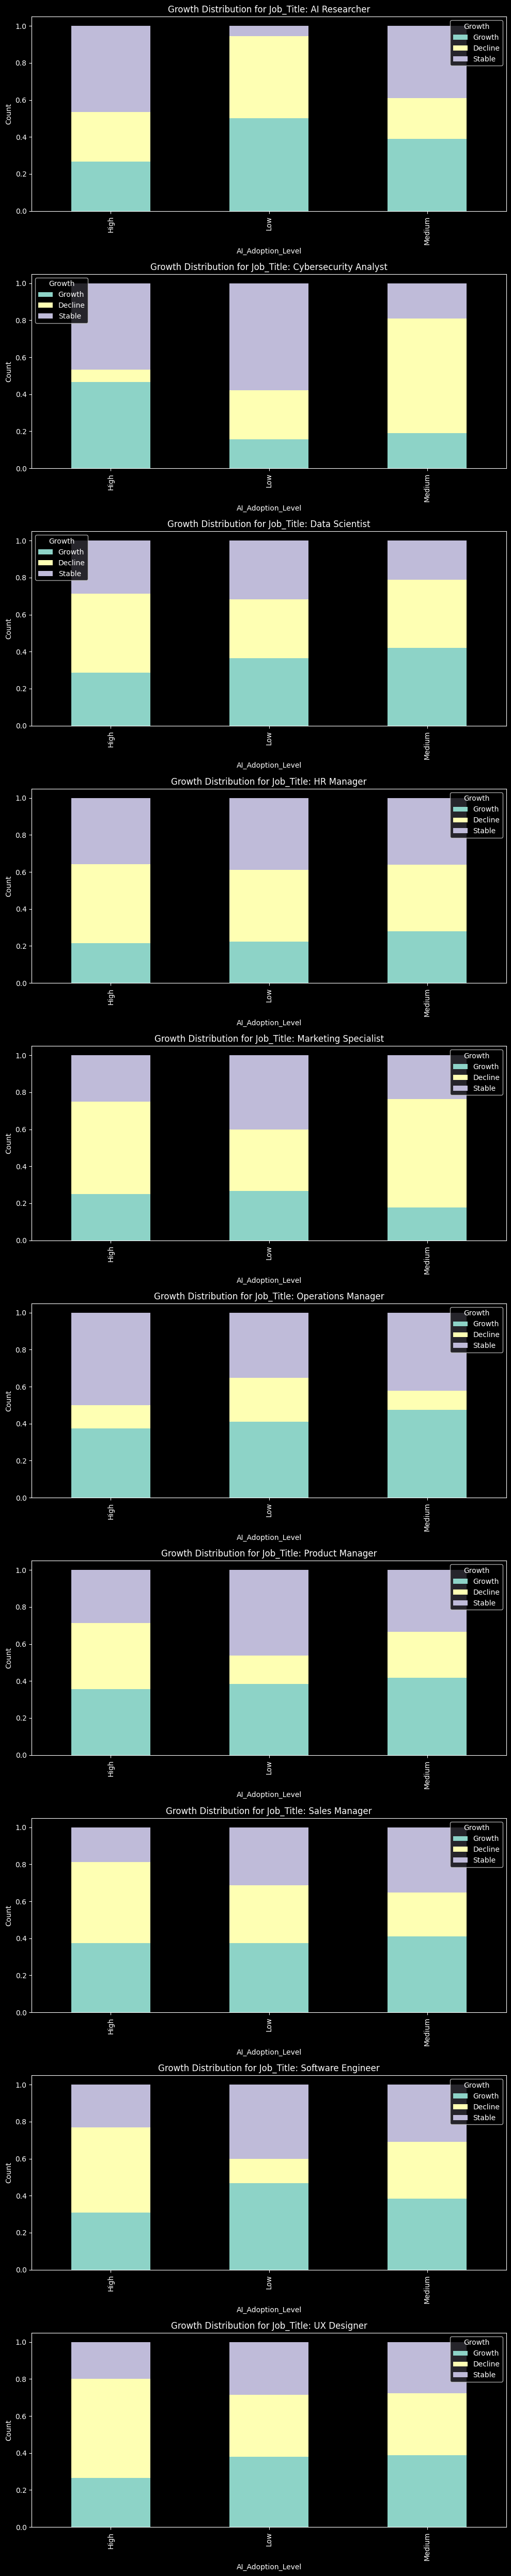

In [889]:
grouped = df.groupby(['Job_Title', 'AI_Adoption_Level', 'Growth']).size().reset_index(name='Count')
pivoted = grouped.pivot_table(index=['Job_Title','AI_Adoption_Level'], columns='Growth', values='Count', fill_value=0).reset_index()
pivoted[['Growth', 'Decline', 'Stable']] = pivoted[['Growth', 'Decline', 'Stable']].div(pivoted[['Growth', 'Decline', 'Stable']].sum(axis=1), axis=0)
industries = pivoted['Job_Title'].unique()
fig, axes = plt.subplots(len(industries), 1, figsize=(10, 5*len(industries)))
for i, size in enumerate(industries):
    ax = axes[i]
    subset = pivoted[pivoted['Job_Title'] == size]
    subset.set_index('AI_Adoption_Level')[['Growth', 'Decline', 'Stable']].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Growth Distribution for Job_Title: {size}')
    ax.set_ylabel('Count')
    ax.set_xlabel('AI_Adoption_Level')
plt.tight_layout()
plt.show()

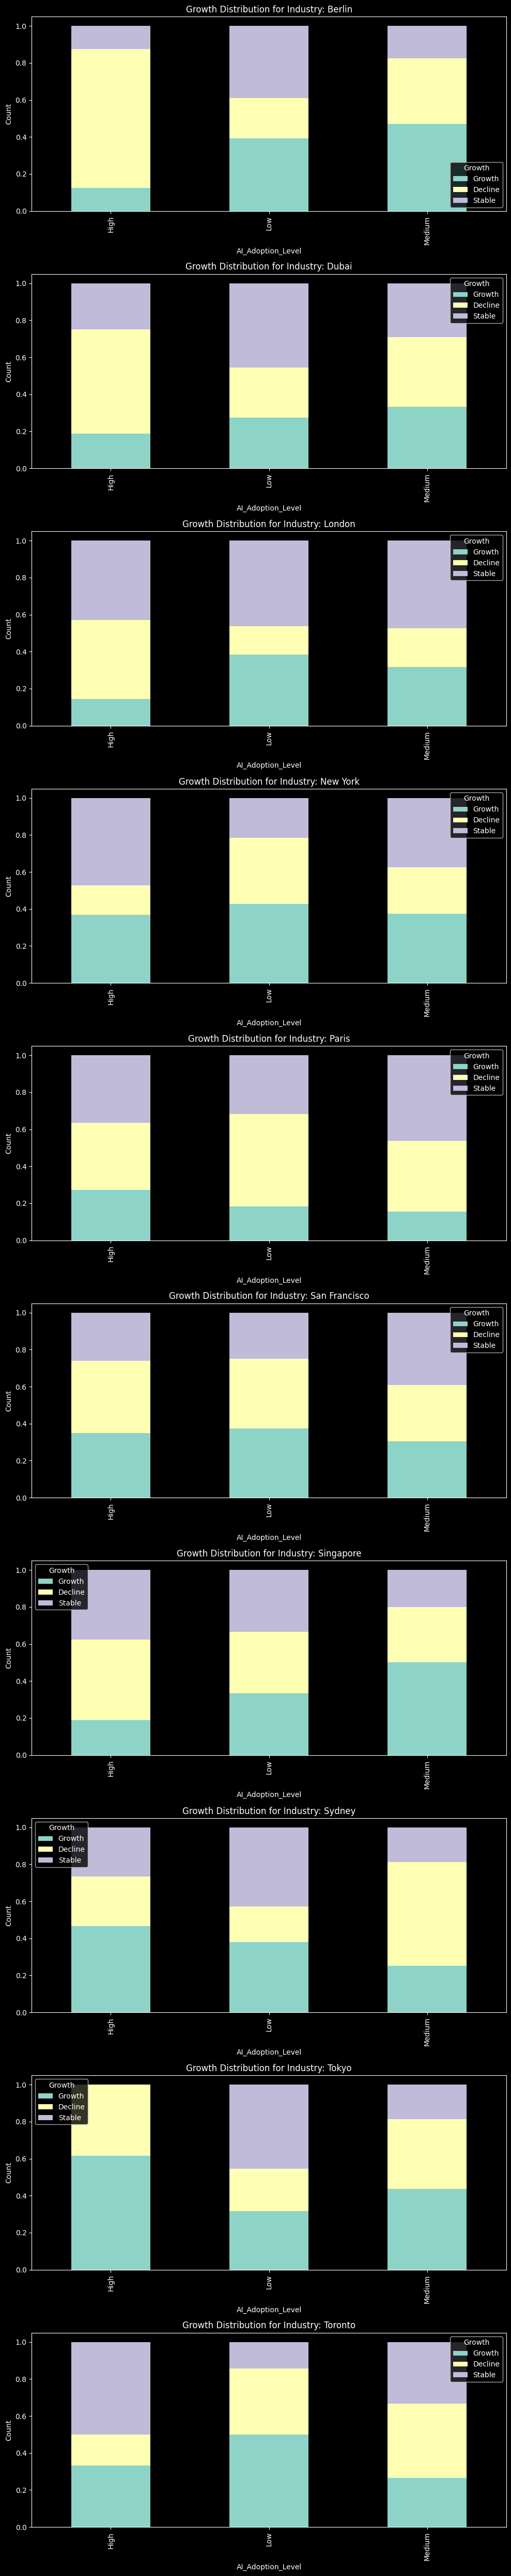

In [890]:
grouped = df.groupby(['Location', 'AI_Adoption_Level', 'Growth']).size().reset_index(name='Count')
pivoted = grouped.pivot_table(index=['Location','AI_Adoption_Level'], columns='Growth', values='Count', fill_value=0).reset_index()
pivoted[['Growth', 'Decline', 'Stable']] = pivoted[['Growth', 'Decline', 'Stable']].div(pivoted[['Growth', 'Decline', 'Stable']].sum(axis=1), axis=0)
industries = pivoted['Location'].unique()
fig, axes = plt.subplots(len(industries), 1, figsize=(10, 5*len(industries)))
for i, size in enumerate(industries):
    ax = axes[i]
    subset = pivoted[pivoted['Location'] == size]
    subset.set_index('AI_Adoption_Level')[['Growth', 'Decline', 'Stable']].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Growth Distribution for Industry: {size}')
    ax.set_ylabel('Count')
    ax.set_xlabel('AI_Adoption_Level')
plt.tight_layout()
plt.show()

In [891]:
df_New = df[df['Location']=='Paris']
df_New.groupby(['AI_Adoption_Level','Automation_Risk','Company_Size'])['Growth'].value_counts()

AI_Adoption_Level  Automation_Risk  Company_Size  Growth 
High               High             Large         Stable     1
                                    Small         Decline    1
                   Low              Large         Decline    1
                                                  Stable     1
                                    Medium        Stable     1
                                    Small         Decline    2
                                                  Growth     1
                   Medium           Large         Growth     2
                                                  Stable     1
Low                High             Large         Decline    2
                                    Medium        Decline    3
                                    Small         Decline    1
                                                  Stable     1
                   Low              Large         Decline    2
                                    Medium        Stable    

In [892]:
df.groupby(['Job_Title','Growth'])['Salary_USD'].mean()

Job_Title              Growth 
AI Researcher          Decline    101250.426496
                       Growth      95773.958800
                       Stable      89284.313022
Cybersecurity Analyst  Decline     91202.979193
                       Growth      84791.844229
                       Stable      90848.006092
Data Scientist         Decline     93519.595728
                       Growth      86908.399531
                       Stable      94639.493464
HR Manager             Decline     91531.096589
                       Growth      83229.458302
                       Stable      90878.807685
Marketing Specialist   Decline     91479.801268
                       Growth      84726.228340
                       Stable      95007.937298
Operations Manager     Decline    104937.565484
                       Growth      94636.581746
                       Stable      96254.452524
Product Manager        Decline     81298.275364
                       Growth      96773.520333
         

In [893]:
df['Job_Skill'] = df['Job_Title'] + df['Required_Skills']

In [894]:
import scipy.stats as stats
categorical_columns = ['Job_Title', 'Industry', 'Company_Size', 'Location',
                       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 
                       'Remote_Friendly','Job_Skill']
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Growth'])
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    if p < 0.05:
        print(f'{col} and Growth is significant')
    else:
        print(f'{col} and Growth is not significant')


Job_Title and Growth is not significant
Industry and Growth is not significant
Company_Size and Growth is not significant
Location and Growth is not significant
AI_Adoption_Level and Growth is not significant
Automation_Risk and Growth is not significant
Required_Skills and Growth is not significant
Remote_Friendly and Growth is not significant
Job_Skill and Growth is not significant


In [895]:
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calculate Cramér's V for each feature
for col in ['Job_Title', 'Industry', 'Company_Size', 'Location', 
            'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 
            'Remote_Friendly','Job_Skill']:
    contingency_table = pd.crosstab(df[col], df['Growth'])
    cramers_v_value = cramers_v(contingency_table.to_numpy())
    
    print(f"Cramér's V for {col}: {cramers_v_value}\n")


Cramér's V for Job_Title: 0.14196187776981115

Cramér's V for Industry: 0.153411709347479

Cramér's V for Company_Size: 0.09202564788107799

Cramér's V for Location: 0.12177873820655832

Cramér's V for AI_Adoption_Level: 0.04874487717443049

Cramér's V for Automation_Risk: 0.04719884780963732

Cramér's V for Required_Skills: 0.10855486540434127

Cramér's V for Remote_Friendly: 0.03289123095616232

Cramér's V for Job_Skill: 0.45897085991965747



In [896]:
from scipy import stats
groups = [df['Salary_USD'][df['Growth'] == group] for group in df['Growth'].unique()]
f_statistic, p_value = stats.f_oneway(*groups)
print(f'ANOVA F-statistic: {f_statistic}')
print(f'p-value: {p_value}')

ANOVA F-statistic: 0.4739365049287704
p-value: 0.6228278420043335


In [907]:
df[df['Location']=='Paris']['Company_Size'].value_counts()

Company_Size
Small     17
Large     15
Medium    14
Name: count, dtype: int64

# Conclusions
- Salary, AI adoption level, Remote friendly, automation risk, and company size doesn't seem to affect om job growth/decline </br>
- Job_Title has better impact on growth/decline justified by required skills, mostly marketing, python, sales, and communication skills seem to be in declining need, while ml, project management, and ui/ux design seem to be in demand </br>
- based on these job_titles, industries are affected, but there is no general trend, it all depends what type of skills are needed in industry </br>
- Based on location, Tokyo and New York seem to have better job growth, while dubai and patris seem to have critical job decline </br>
- There could be relation betweem Location and Company Size-Ai adoption-Automation, in location like paris, large companies experienced decline on low ai adoption and low automation risk, while small companies experienced decline on high ai adoption and high automation risk, which could be explained based on location specific mindset of people, whether trust to AI, whether to remove laber force for repetitive tasks, and automate while getting criticism from people for layoffs </br>
    - So for tokya, we could say, people tend to reduce costs in smaller companies by using ai and automation, so causes job decline, while large companies don't quite trust ai and don't do layoffs. Since Paris has more small companies so overall there is job decline in Paris, same analysis could be done in each location to get better insights </br>
- <b>Major predictor for Growth is: </br>What Job you are going for? with what skill? and Where??</b>

In [897]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Growth,Job_Skill
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth,Cybersecurity AnalystUX/UI Design
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline,Marketing SpecialistMarketing
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth,AI ResearcherUX/UI Design
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth,Sales ManagerProject Management
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline,Cybersecurity AnalystJavaScript


In [898]:
df.isna().sum()

Job_Title            0
Industry             0
Company_Size         0
Location             0
AI_Adoption_Level    0
Automation_Risk      0
Required_Skills      0
Salary_USD           0
Remote_Friendly      0
Growth               0
Job_Skill            0
dtype: int64

In [899]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Growth', 'Job_Skill'],
      dtype='object')

In [900]:
x = df.drop(columns=['Salary_USD','Growth','Company_Size','Automation_Risk','AI_Adoption_Level','Remote_Friendly'])
y = df['Growth']

In [901]:
x

,Job_Title,Industry,Location,Required_Skills,Job_Skill
0,Cybersecurity Analyst,Entertainment,Dubai,UX/UI Design,Cybersecurity AnalystUX/UI Design
1,Marketing Specialist,Technology,Singapore,Marketing,Marketing SpecialistMarketing
2,AI Researcher,Technology,Singapore,UX/UI Design,AI ResearcherUX/UI Design
3,Sales Manager,Retail,Berlin,Project Management,Sales ManagerProject Management
4,Cybersecurity Analyst,Entertainment,Tokyo,JavaScript,Cybersecurity AnalystJavaScript
...,...,...,...,...,...
495,Data Scientist,Telecommunications,Berlin,Machine Learning,Data ScientistMachine Learning
496,Cybersecurity Analyst,Telecommunications,London,UX/UI Design,Cybersecurity AnalystUX/UI Design
497,Cybersecurity Analyst,Energy,Dubai,UX/UI Design,Cybersecurity AnalystUX/UI Design
498,Operations Manager,Healthcare,Paris,Python,Operations ManagerPython


In [902]:
sorted_df = df.groupby('Job_Title')['Growth'].value_counts().unstack(fill_value=0).sort_values(by='Decline')
sorted_df['Rank'] = sorted_df['Decline'].rank(ascending=False, method='dense').astype(int)
sorted_df

Growth,Decline,Growth,Stable,Rank
Job_Title,,,,
Operations Manager,7,19,18,8
Product Manager,10,15,14,7
Software Engineer,12,16,13,6
AI Researcher,16,20,15,5
Sales Manager,16,19,14,5
Cybersecurity Analyst,19,14,22,4
UX Designer,21,19,14,3
HR Manager,22,14,21,2
Data Scientist,23,22,17,1


In [903]:
loc = {
    'London':1, 'New York':2, 'Toronto':3, 'Tokyo':4, 'Berlin':5, 'Sydney':6,
       'Singapore':7, 'Paris':8, 'Dubai':9, 'San Francisco':10
}
jobs ={
    'Operations Manager':1, 'Product Manager':2, 'Software Engineer':3,
       'AI Researcher':4, 'Sales Manager':5, 'Cybersecurity Analyst':6,
       'UX Designer':7, 'HR Manager':8, 'Data Scientist':9, 'Marketing Specialist':10
}
ind ={
    'Transportation':1, 'Telecommunications':2, 'Healthcare':3, 'Finance':4,
       'Education':5, 'Entertainment':6, 'Retail':7, 'Technology':8, 'Energy':9,
       'Manufacturing':10
}
skills={
    'Machine Learning':1, 'Communication':2, 'Data Analysis':3, 'JavaScript':4,
       'UX/UI Design':5, 'Marketing':6, 'Project Management':7, 'Sales':8,
       'Cybersecurity':9, 'Python':10
}
x['Industry'] = x['Industry'].map(ind)
x['Job_Title'] = x['Job_Title'].map(jobs)
x['Location'] = x['Location'].map(loc)
x['Required_Skills'] = x['Required_Skills'].map(skills)

In [904]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = np.where(y=='Decline',0,1)
for i in x[['Job_Skill']].columns:
    x.loc[:,i] = encoder.fit_transform(x[i])

In [905]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [906]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, confusion_matrix
dtg = DecisionTreeClassifier(random_state=2)
params = {
    'max_depth':[2,3,5,7,9,11,8]
}
dtg = GridSearchCV(dtg, param_grid=params,cv=5, n_jobs=-1)
dtg.fit(x_train,y_train)
y_pred = dtg.best_estimator_.predict(x_test)
print("Best params: ",dtg.best_params_)
print("Acurracy: ",accuracy_score(y_pred,y_test))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
featureImps = dtg.best_estimator_.feature_importances_
featImps = [f"{value:.10f}" for value in featureImps]
print("feature Importance: ",)
cols = np.array(x.columns)
for (a,b) in zip(cols,featImps):
    print((a,b))


Best params:  {'max_depth': 2}
Acurracy:  0.7
Precision: 0.75
Recall: 0.87
F1 Score: 0.81
Confusion Matrix:
[[ 8 21]
 [ 9 62]]
feature Importance: 
('Job_Title', '0.4256154342')
('Industry', '0.3882384859')
('Location', '0.0000000000')
('Required_Skills', '0.0000000000')
('Job_Skill', '0.1861460799')


In [908]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred))


Accuracy: 67.00%
Precision: 0.70
Recall: 0.93
F1 Score: 0.80
Confusion Matrix:
[[ 1 28]
 [ 5 66]]
              precision    recall  f1-score   support

           0       0.17      0.03      0.06        29
           1       0.70      0.93      0.80        71

    accuracy                           0.67       100
   macro avg       0.43      0.48      0.43       100
weighted avg       0.55      0.67      0.58       100



In [912]:
from sklearn.naive_bayes import BernoulliNB
NaBys = BernoulliNB()
NaBys.fit(x_train,y_train)
y_pred = NaBys.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred,zero_division=1,average='weighted')
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred,zero_division=1))


Accuracy: 71.00%
Precision: 0.79
Recall: 1.00
F1 Score: 0.83
Confusion Matrix:
[[ 0 29]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        29
           1       0.71      1.00      0.83        71

    accuracy                           0.71       100
   macro avg       0.85      0.50      0.42       100
weighted avg       0.79      0.71      0.59       100



In [913]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfg = RandomForestClassifier(random_state=2,n_jobs=-1)
params = {
    'max_depth':[2,3,4,7,9,11],
    'n_estimators':[5,10,15,20],
    'oob_score':[True],
}
rfg = GridSearchCV(rfg,param_grid=params,n_jobs=-1)
rfg.fit(x_train,y_train)
y_pred = rfg.best_estimator_.predict(x_test)
print("Best params: ",rfg.best_params_)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred,zero_division=1, average='weighted')
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred))
print("OOB score: ",rfg.best_estimator_.oob_score_)
featureImps = rfg.best_estimator_.feature_importances_
featImps = [f"{value:.10f}" for value in featureImps]
print("feature Importance: ",)
cols = np.array(x.columns)
for (a,b) in zip(cols,featImps):
    print((a,b))


Best params:  {'max_depth': 4, 'n_estimators': 15, 'oob_score': True}
Accuracy: 63.00%
Precision: 0.54
Recall: 0.86
F1 Score: 0.77
Confusion Matrix:
[[ 2 27]
 [10 61]]
              precision    recall  f1-score   support

           0       0.17      0.07      0.10        29
           1       0.69      0.86      0.77        71

    accuracy                           0.63       100
   macro avg       0.43      0.46      0.43       100
weighted avg       0.54      0.63      0.57       100

OOB score:  0.6525
feature Importance: 
('Job_Title', '0.2421307105')
('Industry', '0.2123710219')
('Location', '0.2091279992')
('Required_Skills', '0.1209176177')
('Job_Skill', '0.2154526508')
